# Matplotlib

In [8]:
%discover

test-esp32  serial:///dev/ttyUSB0  
Registration failed for ws://10.39.40.135:8266: [Errno 104] Connection reset by peer


imported
create subplots


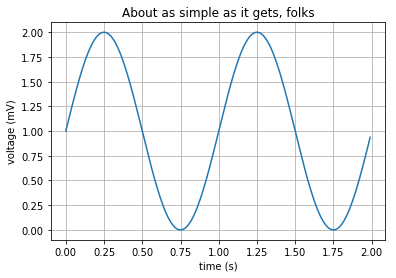

In [6]:
%%host

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [6]:
%connect 'ws://10.39.40.135:8266'
print("abc")

Device not available: 'ws://10.39.40.135:8266'


In [8]:
!ping 10.39.40.135

PING 10.39.40.135 (10.39.40.135) 56(84) bytes of data.
64 bytes from 10.39.40.135: icmp_seq=1 ttl=255 time=284 ms
64 bytes from 10.39.40.135: icmp_seq=2 ttl=255 time=204 ms
64 bytes from 10.39.40.135: icmp_seq=3 ttl=255 time=124 ms
64 bytes from 10.39.40.135: icmp_seq=4 ttl=255 time=43.9 ms
64 bytes from 10.39.40.135: icmp_seq=5 ttl=255 time=271 ms
64 bytes from 10.39.40.135: icmp_seq=6 ttl=255 time=190 ms
64 bytes from 10.39.40.135: icmp_seq=7 ttl=255 time=109 ms
^C

--- 10.39.40.135 ping statistics ---
7 packets transmitted, 7 received, 0% packet loss, time 14ms
rtt min/avg/max/mdev = 43.912/174.983/284.055/81.308 ms
